# Training Models

## Questions

## Keywords

## Notes

### Linear Regression

- Simply a linear regression model is

y = a0 + a1x1 + a2x2 ....

- The constant a0 is called the bias term.

- y is the predictied value

- n is the number of features

- a is ith feature value

- We first need a measure of how well (or poorly), the model fits the training data. In chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square error. We need the find a value of the vector theta that minimizes the RMSE and it leats to the same results.

- The models complexity is n^2

- It is increasing as features increasing

Two solutions;

- Using a direct "closed form" equation that directly computes the model parameters that best fit the model to the training set.

- Using an iterative optimization approach called gradient descent. That gradually tweaks the model parameters to minimize the cost finction overr the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we eill use agin and again when we study neural networks.

## 1-Closed form Normal Equation

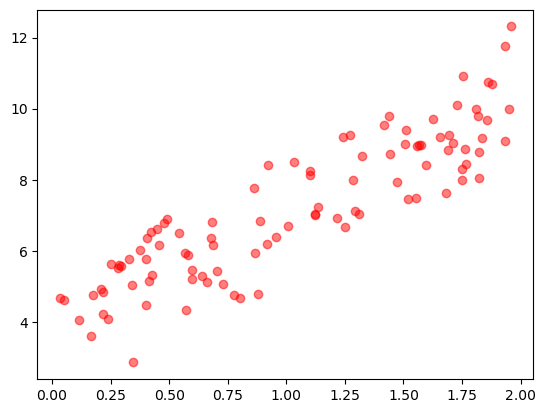

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.5, color="red")
plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), X]; X_b

array([[1.        , 1.76884892],
       [1.        , 1.76169402],
       [1.        , 0.70297428],
       [1.        , 0.68884789],
       [1.        , 0.32878999],
       [1.        , 0.34336292],
       [1.        , 0.57066236],
       [1.        , 1.25145692],
       [1.        , 1.03174404],
       [1.        , 1.47199065],
       [1.        , 1.68820288],
       [1.        , 1.95160212],
       [1.        , 1.72691541],
       [1.        , 1.12057604],
       [1.        , 1.93480903],
       [1.        , 0.28648277],
       [1.        , 0.59672324],
       [1.        , 1.62634806],
       [1.        , 0.80333035],
       [1.        , 1.87776866],
       [1.        , 0.47624319],
       [1.        , 0.20705769],
       [1.        , 0.41267829],
       [1.        , 0.68413507],
       [1.        , 0.4469918 ],
       [1.        , 1.86128838],
       [1.        , 1.32445656],
       [1.        , 1.51142257],
       [1.        , 1.65431404],
       [1.        , 0.91617103],
       [1.

In [3]:
# Normal Equation

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y); theta_best


array([[4.09466767],
       [3.00563404]])

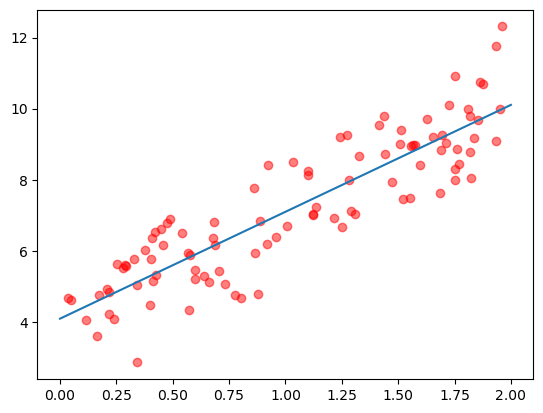

In [4]:
# Those are the parameters
func = lambda x: theta_best.flatten()[0] + theta_best.flatten()[1] * x

space = np.linspace(0, 2, 10)
plt.scatter(X, y, alpha=0.5, color="red")
plt.plot(space, func(space))
plt.show()

In [5]:
X.reshape(1, -1)

array([[1.76884892, 1.76169402, 0.70297428, 0.68884789, 0.32878999,
        0.34336292, 0.57066236, 1.25145692, 1.03174404, 1.47199065,
        1.68820288, 1.95160212, 1.72691541, 1.12057604, 1.93480903,
        0.28648277, 0.59672324, 1.62634806, 0.80333035, 1.87776866,
        0.47624319, 0.20705769, 0.41267829, 0.68413507, 0.4469918 ,
        1.86128838, 1.32445656, 1.51142257, 1.65431404, 0.91617103,
        0.66201572, 1.27228733, 1.24009289, 1.93455456, 1.81890564,
        0.40010172, 1.75037043, 0.04916761, 0.1725373 , 0.48920857,
        1.75288216, 0.23966177, 0.42230244, 0.77552966, 0.73023941,
        0.27953924, 1.71351626, 0.21565515, 0.45760387, 1.13723727,
        0.57808385, 1.10150644, 0.67765461, 1.00688888, 0.88909837,
        0.63838143, 1.8206826 , 1.56560732, 1.28250569, 1.85463615,
        0.16411599, 0.34056382, 1.44138026, 1.59452005, 1.43837541,
        1.09988947, 0.92147968, 0.59717112, 0.29251143, 0.42582635,
        0.86109749, 0.87746648, 1.12405796, 1.30

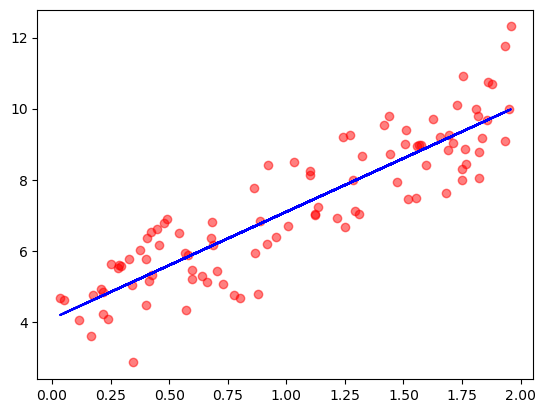

In [6]:
## Using scikit learn.

from sklearn.linear_model import LinearRegression

l = LinearRegression(fit_intercept=True)
l.fit(X, y)


plt.scatter(X, y, alpha=0.5, color="red")
plt.plot(X, l.predict(X), color="b")
plt.show()


In [7]:
l.coef_

array([[3.00563404]])

Both the Normal Equation and the SVD approach get very slow when the number of features grows large. On the positive side both are linear with regard to the number of instancees in the training set.

## Gradient Descent

- Gradient descent is a generic algorithm to find the minima of the cost function.

- Downside of the gradient descent algorithm is that it can get stuck on the plateus for a function that is not have much gradient or it can get
stuck in the local minima.

- When using gradient descent you should ensure that all features have a similar scale, or lese it will take much longer to converge.

- Batch gradient descent takes all of the data in one iteration, on the opposite extreme stochastic gradient descent takes one instance at first and tries to optimize for that random x value

- Mini Batch Gradient descent is taking randomly mini batch instances to calcylate the model's parameters.

## Polynimial Regression.

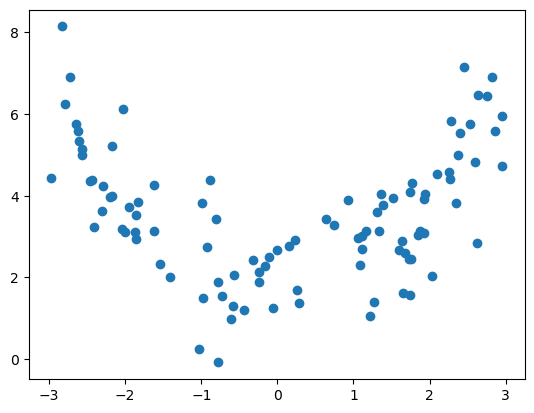

In [8]:
m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

plt.scatter(X, y)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X); X_poly

array([[ 1.39240332e+00,  1.93878701e+00],
       [-3.19756649e-01,  1.02244314e-01],
       [-2.00721380e+00,  4.02890725e+00],
       [-1.85982018e+00,  3.45893110e+00],
       [ 6.41428019e-01,  4.11429904e-01],
       [ 2.44914770e+00,  5.99832446e+00],
       [ 1.87323733e+00,  3.50901810e+00],
       [ 2.94862865e+00,  8.69441093e+00],
       [-1.62677151e+00,  2.64638555e+00],
       [-5.16891135e-02,  2.67176446e-03],
       [ 2.25874430e+00,  5.10192581e+00],
       [ 1.26524570e+00,  1.60084668e+00],
       [-6.07124323e-01,  3.68599943e-01],
       [ 1.15877765e+00,  1.34276564e+00],
       [ 1.64218333e+00,  2.69676610e+00],
       [-2.04060210e+00,  4.16405694e+00],
       [-9.84311389e-01,  9.68868910e-01],
       [ 1.05422015e+00,  1.11138012e+00],
       [-2.56701427e+00,  6.58956228e+00],
       [-5.83995341e-01,  3.41050558e-01],
       [ 2.35502970e-01,  5.54616490e-02],
       [ 7.44052076e-01,  5.53613492e-01],
       [-1.95268690e+00,  3.81298613e+00],
       [-2.

In [10]:
l = LinearRegression()
l.fit(X_poly, y)

l.coef_, l.intercept_

(array([[0.00966976, 0.4871032 ]]), array([1.9194528]))

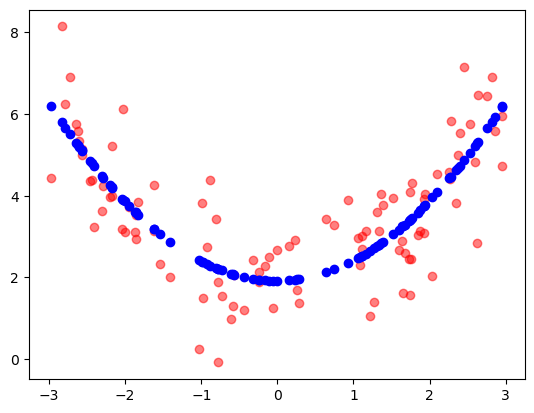

In [11]:


plt.scatter(X, y, alpha=0.5, color="red")
plt.scatter(X, l.predict(X_poly), color="b")
plt.show()


## Regularization
### Bias And Variance.

- Inabilty of a machine learning method to capture true relationship is called bias.

- Ability to learn the training data called variance.

- In machine learning the ideal algorithm has low bias and accurately model the true relationship.

- And it has low variablity by producing consistent predictions across different datasets.

- This is done by finding the sweet spot between a simple model and a complex model.

- Regularization constrain the weights.



### Rigde

- Ridge regression is a regularized version of Linear Regression.

- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term only be addet to the cost function during training. Once the model is trained you want to use the unregularized performance to measure to evaluate the model's performance.

- if alpha = 0 then ridge regression is just linear regression if alpha is really large the model weights are up to very close to 0 end up very close to zero and the result is a flat line going through the data's mean.

- Ridge regression is actually a squared penalty, if you think in general.

### Lasso
- An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features.

### Elastic Net

- Elastic net is a combination of lasso and ridge. There is a more hyperparameter called r when it equals to 0 it is equal to ridge and when it equals to 1 it is lasso.

- Generally speaking you should avoid using linear regression.

### Early stopping

- Is a simple and useful technique for reducing overfitting you stop the gradient descent when validation set is not learning anymore.




In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('Hitters_Data.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [14]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [15]:
## One Hot Encoding.
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(drop="first", sparse_output=False)
cats = df.select_dtypes("object").columns

encoded_cats = one.fit_transform(df[cats]); encoded_cats

array([[1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 1

In [16]:
## Standart Scaler.
from sklearn.preprocessing import StandardScaler

sl = StandardScaler()

sl.fit_transform(df.drop(columns=cats))

array([[-0.6029005 , -0.59567545, -0.5285512 , ..., -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619, ..., -0.25386267,
         0.81996395, -0.12420791],
       [ 0.62816682,  0.73648988,  0.95878753, ..., -0.74417894,
        -0.84821868, -0.07978915],
       ...,
       [ 0.48533581,  0.40344855, -0.98619389, ..., -0.03978092,
        -0.24160682, -0.33519701],
       [ 1.15188054,  0.80309815, -0.29972986, ...,  0.08452461,
         0.51665801,  0.94184228],
       [ 1.54636621,  1.38036979, -0.29972986, ..., -0.79251998,
        -0.84821868,  1.0306798 ]])

In [17]:
from sklearn.compose import ColumnTransformer

num_attribs = df.drop(columns=[*cats, "Salary"]).columns
cat_attribs = cats

prep_pipe = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_attribs)
])

prep_pipe.fit_transform(df).shape

(263, 19)

In [18]:
df.shape

(263, 20)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Salary"),
                                                    df["Salary"],
                                                    test_size=0.2,
                                                    random_state=1337)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 19), (53, 19), (210,), (53,))

In [20]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("preprocess", prep_pipe),
    ("Ridge", Ridge(alpha=0))
])


pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.17859092756623585

In [21]:
pipe.named_steps["Ridge"].coef_

array([-102.87296492,  231.12076999,   19.79674121,  -76.91478019,
        -25.95848548,   93.09697129,   -4.75238743, -595.48029545,
        630.61414487,   73.52481068,  149.18579484,   -8.08223635,
         -5.30072425,   81.19223548,   24.33833797,  -28.22398564,
         51.16541245, -115.26722034,  -41.23340234])

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("preprocess", prep_pipe),
    ("Ridge", Ridge(alpha=1))
])

param_grid = {
    "Ridge__alpha": np.arange(10)
}

grid_search = GridSearchCV(pipe, param_grid, scoring="r2", cv=5)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'Ridge__alpha': 9}

In [23]:
print("Best Score (r2) is:", grid_search.best_score_)
print("Best Param is:", grid_search.best_params_)

Best Score (r2) is: 0.48979679652849883
Best Param is: {'Ridge__alpha': 9}


In [24]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007789,0.002442,0.003867,0.000551,0,{'Ridge__alpha': 0},0.466492,0.322950,0.606528,0.585571,0.362000,0.468708,0.114270,10
1,0.007518,0.001145,0.003665,0.000899,1,{'Ridge__alpha': 1},0.463213,0.334843,0.624031,0.581802,0.401743,0.481126,0.108240,9
2,0.006716,0.001028,0.003630,0.000973,2,{'Ridge__alpha': 2},0.467966,0.340307,0.630816,0.579561,0.398239,0.483378,0.108577,8
3,0.007128,0.001477,0.003504,0.000692,3,{'Ridge__alpha': 3},0.472281,0.344480,0.635085,0.577658,0.394972,0.484895,0.108742,7
4,0.007054,0.001499,0.003596,0.000486,4,{'Ridge__alpha': 4},0.475884,0.348015,0.638139,0.575976,0.392322,0.486067,0.108775,6
5,0.006952,0.001170,0.003697,0.001174,5,{'Ridge__alpha': 5},0.478893,0.351152,0.640456,0.574494,0.390163,0.487032,0.108721,5
6,0.006181,0.000968,0.003732,0.001146,6,{'Ridge__alpha': 6},0.481439,0.354000,0.642277,0.573190,0.388373,0.487856,0.108612,4
7,0.006896,0.001083,0.003558,0.000966,7,{'Ridge__alpha': 7},0.483627,0.356617,0.643743,0.572039,0.386861,0.488577,0.108468,3
8,0.007226,0.001688,0.003687,0.001959,8,{'Ridge__alpha': 8},0.485533,0.359039,0.644944,0.571020,0.385562,0.489219,0.108302,2
9,0.006541,0.001131,0.003266,0.000748,9,{'Ridge__alpha': 9},0.487213,0.361291,0.645938,0.570112,0.384429,0.489797,0.108124,1


In [25]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ("preprocess", prep_pipe),
    ("Model", Ridge())
])

param_grid = [
    {"Model": [Ridge(max_iter=10000)], "Model__alpha": np.arange(1, 10)},
    {"Model": [Lasso(max_iter=10000)], "Model__alpha": np.arange(1, 10)},
    {"Model": [LinearRegression()]}
]

grid_search = GridSearchCV(pipe, param_grid, scoring="r2", cv=10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         Index(['League', 'Division', 'NewLeague'], dtype='object'))])),
                                       ('Model', Ridge())]),
             param_grid=[{'Model': [Ridge(alpha=9, max_iter=10000)],
                          'Model__alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                         {'Model': [Lasso(max_iter=10000)],
                          'Model__alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                         {'Model': [LinearRegression()]}],
             scoring='r2')

In [39]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008467,0.003218,0.005011,0.002978,"Ridge(alpha=9, max_iter=10000)",1,"{'Model': Ridge(alpha=9, max_iter=10000), 'Mod...",0.548094,0.422266,0.463303,0.625001,0.376258,0.740413,0.607372,0.329554,0.542328,0.390587,0.504518,0.123522,9
1,0.005795,0.001029,0.003497,0.000672,"Ridge(alpha=9, max_iter=10000)",2,"{'Model': Ridge(alpha=9, max_iter=10000), 'Mod...",0.544567,0.432540,0.461566,0.628460,0.378659,0.746785,0.611456,0.341746,0.552181,0.406594,0.510455,0.121641,8
2,0.006110,0.001098,0.003911,0.001574,"Ridge(alpha=9, max_iter=10000)",3,"{'Model': Ridge(alpha=9, max_iter=10000), 'Mod...",0.541695,0.441212,0.459847,0.630937,0.381131,0.751188,0.613390,0.350471,0.555841,0.414664,0.514038,0.120342,7
3,0.005983,0.002035,0.003233,0.000893,"Ridge(alpha=9, max_iter=10000)",4,"{'Model': Ridge(alpha=9, max_iter=10000), 'Mod...",0.539505,0.448728,0.458252,0.632737,0.383652,0.754300,0.614249,0.357215,0.557338,0.420166,0.516614,0.119205,6
4,0.006316,0.001058,0.003246,0.001085,"Ridge(alpha=9, max_iter=10000)",5,"{'Model': Ridge(alpha=9, max_iter=10000), 'Mod...",0.537844,0.455346,0.456801,0.634069,0.386176,0.756553,0.614517,0.362677,0.557864,0.424388,0.518624,0.118157,5


In [40]:
grid_search.best_params_

{'Model': Ridge(alpha=9, max_iter=10000), 'Model__alpha': 9}

In [41]:
grid_search.best_score_

0.5238689138993868

In [42]:
coefs = grid_search.best_estimator_.named_steps["Model"].coef_

pd.Series(index=X_train.columns, data=coefs)

AtBat        0.035145
Hits         0.233500
HmRun        0.041046
Runs         0.024286
RBI         -0.057903
Walks        0.121031
Years        0.278731
CAtBat       0.073065
CHits        0.124158
CHmRun      -0.025426
CRuns        0.091266
CRBI        -0.036777
CWalks       0.007712
League       0.087321
Division     0.017844
PutOuts     -0.071296
Assists      0.107548
Errors      -0.181072
NewLeague   -0.066502
dtype: float64

In [44]:
# Lets Checkout the real score
from sklearn.metrics import mean_squared_error

mean_squared_error(grid_search.predict(X_test), y_test)

0.6133101060853923

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("preprocess", prep_pipe),
    ("Ridge", Ridge(alpha=1))
])

param_grid = {
    "Ridge__alpha": np.arange(10)
}

grid_search = GridSearchCV(pipe, param_grid, scoring="r2", cv=5)

grid_search.fit(X_train, y_train)

grid_search.best_score_

0.5501704633494195

In [51]:
from sklearn.metrics import r2_score
r2_score(grid_search.predict(X_test), y_test)

-0.10494477064226992